# Uso de word embeddings
En este notebook utilizaremos un conjunto de Word embeddings en español para ver como podemos usarlo y para que tareas servirían

In [1]:
import os, re
import nltk
import pandas as pd
import sklearn
import gensim
from sklearn import manifold
import seaborn as sns


Importamos el archivo de Word embeddings

In [2]:
os.getcwd()

'/Users/habi/Documents/personal/nlp_course/clase 22 agosto'

In [3]:
from gensim.models import KeyedVectors
#os.chdir("/content/drive/My Drive/corpus/Otros_texto")
os.chdir('/Users/habi/Documents/personal')
# Link de archivo SBW
# word2Vec embeddings from SBWC
# https://github.com/dccuchile/spanish-word-embeddings
modelo = KeyedVectors.load_word2vec_format('SBW-vectors-300-min5.bin.gz', binary=True)



Podemos calcular los *k* vecinos más cercanos a una palabra

In [4]:
#similitudes de una palabra
similitud=modelo.similar_by_word("alimenticio", topn=50, restrict_vocab=300000)
similitud


[('alimentario', 0.792665958404541),
 ('dietético', 0.6628462672233582),
 ('alimenticios', 0.6227770447731018),
 ('alimento', 0.6160340905189514),
 ('nutricional', 0.6138904690742493),
 ('nutritivo', 0.6030381917953491),
 ('nutritivas', 0.5713231563568115),
 ('nutricionales', 0.5702103972434998),
 ('nutrimental', 0.5639523863792419),
 ('alimentos', 0.5576946139335632),
 ('medicamentoso', 0.5559772253036499),
 ('alimentarios', 0.5527542233467102),
 ('mayonesas', 0.5521297454833984),
 ('cárnico', 0.545059084892273),
 ('lácteo', 0.5445379018783569),
 ('vitamínico', 0.5420364737510681),
 ('prebióticos', 0.540791928768158),
 ('agroquímico', 0.5301523208618164),
 ('nutritivos', 0.5268266201019287),
 ('endulzante', 0.5267912149429321),
 ('endulzantes', 0.526153028011322),
 ('calórico', 0.5244935750961304),
 ('Depuralina', 0.5221549868583679),
 ('alergénico', 0.5217621326446533),
 ('nutritiva', 0.5213720202445984),
 ('tisanas', 0.5211535692214966),
 ('vitamínicas', 0.5199115872383118),
 ('pulp

Sin embargo, los resultados pueden estar sesgados por la cultura y por los sesgos que los seres humanos ya tenemos. Por ejemplo

In [5]:
similitud2=modelo.similar_by_word("mujer", topn=50, restrict_vocab=300000)
similitud2


[('niña', 0.7468613386154175),
 ('muchacha', 0.7343084812164307),
 ('persona', 0.7217705845832825),
 ('hombre', 0.7174482941627502),
 ('fémina', 0.7114294171333313),
 ('anciana', 0.708166241645813),
 ('joven', 0.7036720514297485),
 ('jovencita', 0.7007799744606018),
 ('marido', 0.690261960029602),
 ('esposo', 0.6873509287834167),
 ('esposa', 0.6745600700378418),
 ('prostituta', 0.6566933989524841),
 ('embarazada', 0.6501801609992981),
 ('sexagenaria', 0.6497166752815247),
 ('madre', 0.6432695388793945),
 ('chica', 0.6407369375228882),
 ('adolescente', 0.6385993957519531),
 ('pareja', 0.6363171935081482),
 ('septuagenaria', 0.631632924079895),
 ('cuarentona', 0.6294296979904175),
 ('hija', 0.6284517049789429),
 ('ella', 0.6271185874938965),
 ('parapléjica', 0.624487042427063),
 ('hijastra', 0.6232087016105652),
 ('acuchillada', 0.6231945753097534),
 ('mujeres', 0.6229810118675232),
 ('sirvienta', 0.6219694018363953),
 ('cuñada', 0.6205692887306213),
 ('víctima', 0.6180681586265564),
 ('

Probemos con el que usted desee

In [6]:
similitud3=modelo.similar_by_word("vehículo", topn=50, restrict_vocab=300000)
similitud3


[('automóvil', 0.8449662327766418),
 ('camión', 0.8032729625701904),
 ('camioneta', 0.7934376001358032),
 ('coche', 0.7672141790390015),
 ('motocicleta', 0.7655367255210876),
 ('carro', 0.7342464923858643),
 ('conductor', 0.7216777801513672),
 ('vehículos', 0.7185602188110352),
 ('ecotaxi', 0.7152096033096313),
 ('Sentra', 0.7135573029518127),
 ('furgoneta', 0.7122205495834351),
 ('chofer', 0.7118712067604065),
 ('Jeep', 0.7111682295799255),
 ('vehiculo', 0.7103639245033264),
 ('tsuru', 0.7031404972076416),
 ('torton', 0.7029312252998352),
 ('Tsuru', 0.7020263075828552),
 ('microbús', 0.7014415860176086),
 ('todoterreno', 0.6987150311470032),
 ('Jetta', 0.6954854726791382),
 ('automovilista', 0.6918030977249146),
 ('estaquitas', 0.6878708600997925),
 ('ciclomotor', 0.6848747134208679),
 ('chocada', 0.68404620885849),
 ('Tiida', 0.6826857924461365),
 ('Xtrail', 0.6825708746910095),
 ('Tida', 0.6818994879722595),
 ('midibús', 0.6812483072280884),
 ('estacionado', 0.6802089214324951),
 ('

En principio los vectores se pueden *operar*, lo que implica que si a rey lo resto de hombre y le sumo mujer, debiera obtener algo similar a una reina:
reina=rey-hombre+mujer

In [7]:
##similitudes en relación
analogia1=modelo.most_similar(positive=["rey", "mujer"],negative=["hombre"], topn=5, restrict_vocab=300000)
analogia1


[('reina', 0.7493031620979309),
 ('consorte', 0.7034263014793396),
 ('princesa', 0.686154305934906),
 ('reyes', 0.6391464471817017),
 ('Eriksdotter', 0.6360354423522949)]

Funcionará cuando qiuero saber un componente de un todo?

In [8]:
analogia2=modelo.most_similar(positive=["trompeta", "rock"],negative=["jazz"], topn=5, restrict_vocab=300000)
analogia2


[('guitarra', 0.5890582799911499),
 ('banda', 0.5711548924446106),
 ('trompetas', 0.5636847615242004),
 ('tuba', 0.5532137155532837),
 ('trombón', 0.5528616309165955)]

En este caso, quizás por la polisemia, el resultado es malo

In [9]:
analogia3=modelo.most_similar(positive=["baloncesto", "fútbol"],negative=["aro"], topn=5, restrict_vocab=300000)
analogia3


[('voleibol', 0.6411386132240295),
 ('balonmano', 0.6357669830322266),
 ('rugby', 0.6266654133796692),
 ('futbol', 0.6047141551971436),
 ('Fútbol', 0.6009125113487244)]

También puedo detectar la palabra que no pertenece, mirando la de mayor distancia a la media de palabras.

In [10]:
##palabra extraña
modelo.doesnt_match("hombre mujer anciano oficina".split())


'oficina'

Probemos con otro conjunto

In [11]:
modelo.doesnt_match("pan carne trigo harina".split())

'carne'

Puedo calcular directamente la similitud entre dos plabras , o su complemento, la distancia.

In [12]:
modelo.similarity("perro","casa")


0.39060092

In [13]:
modelo.distance("perro","gato")


0.25541186332702637

In [14]:
modelo.similarity("perro","gato")


0.74458814

Puedo extender esa similitud a grupos de palabras, porque los vectores se pueden operar, así que se pueden promediar.

In [15]:
simgrup = modelo.n_similarity(['sushi', 'tienda'], ['japón', 'restaurante'])
simgrup


0.7589176

Una aproximación más sofisticada permite ver el problema de distancia entre documentos como un **problema de transporte** donde los costos son las distancias entre palabras, los origenes y destinos las palabras en sí mismas, y los volúmenes a transportar las representaciones TF normalizadas con L1

In [16]:
frase1 = 'Estoy contento por mi ascenso'.lower().split()
frase2 = 'Me encuentro feliz por mi nuevo sueldo'.lower().split()
frase3 = "Me fui de vacaciones alegremente".lower().split()
similaridad12 = modelo.wmdistance(frase1, frase2)
similaridad13= modelo.wmdistance(frase2, frase3)
similaridad23= modelo.wmdistance(frase1, frase3)
print(similaridad12," ",similaridad13, " ",similaridad23)

0.7136494002134436   0.8629768060619429   0.949241442100478


Otra aplicación es visualizar grupos de palabras por similitudes. Con T-SNE hago una reducción de dimensiones basada en teoría de la información y puedo obtener una representación bidimensional de palabras para ser comparadas.

In [17]:
tsne=sklearn.manifold.TSNE(perplexity=3)
palabras=["salados","cocidas","chiles","puré","mermelada","salchicha","ahumado","hamburguesa","bollo","cocinados","pelado","picadas","piñones","churros","cocinan","tamal","cocidos","yema","molido","chicha","serrano","garbanzos","fideos","gallina","galletas","jamón","tortilla"]
vectors=modelo[palabras]

reduccion=tsne.fit_transform(vectors)

/Users/habi/opt/anaconda3/envs/jave/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/habi/opt/anaconda3/envs/jave/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [18]:
base=pd.DataFrame()
base["primer_componente"]=reduccion[:,0]
base["segundo_componente"]=reduccion[:,1]
base["nombres"]=palabras
display(base)

,primer_componente,segundo_componente,nombres
0,-147.886978,-248.953979,salados
1,-88.765144,-84.008972,cocidas
2,170.143127,174.264160,chiles
3,124.741638,-55.077801,puré
4,125.663223,-107.453796,mermelada
5,279.926208,-24.099283,salchicha
6,77.543816,18.147205,ahumado
7,306.044525,8.808464,hamburguesa
8,-130.669617,352.188385,bollo
9,-120.418114,-174.482727,cocinados


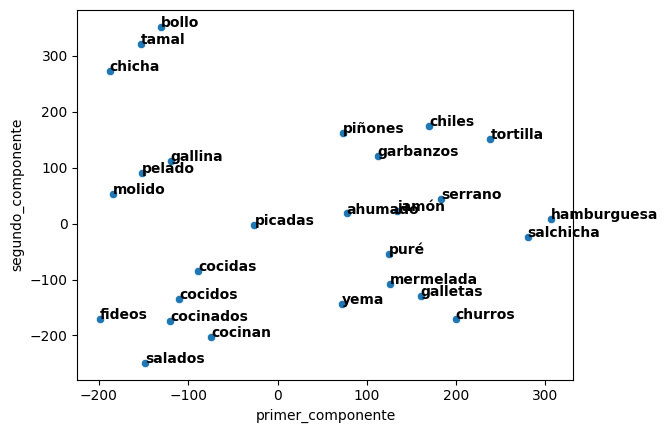

In [19]:
graf1=sns.scatterplot(x="primer_componente", y="segundo_componente", data=base)

for line in range(0,base.shape[0]):
     graf1.text(base.primer_componente[line]+0.01, base.segundo_componente[line], 
     base.nombres[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')